In [1]:
from typing_extensions import TypedDict

class State(TypedDict):
    ex1: int
    ex2: int

In [11]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict

from pydantic import BaseModel

## The overall state of the graph (this is the public state shared across nodes)
class OverallState(BaseModel):
    a:str

def node(state:OverallState):
    return {"a ":"Hi!"}

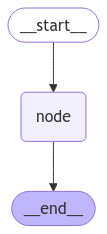

In [12]:
builder = StateGraph(OverallState)
builder.add_node(node)
builder.add_edge(START,"node")
builder.add_edge("node",END)
graph=builder.compile()

from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [13]:
graph.invoke({"a":"Hello"})

{'a': 'Hello'}

In [18]:
try:
    graph.invoke({"a":1}) ## This should be a string
except Exception as e:
    print("Exception is raised because 'a' value is not a string")

Exception is raised because 'a' value is not a string


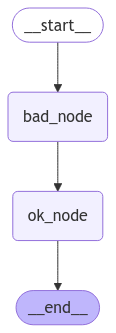

In [ ]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict
from pydantic import BaseModel

class OverallState(BaseModel):
    a:str

def bad_node(state: OverallState):
    return {
        "a": 123 ## Invalid
    }

def ok_node(state:OverallState):
    return{
        "a": "Hi"
    }

builder = StateGraph(OverallState)
builder.add_node(bad_node)
builder.add_node(ok_node)
builder.add_edge(START,"bad_node")
builder.add_edge("bad_node","ok_node")
builder.add_edge("ok_node",END)
graph=builder.compile()

from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
graph.invoke({"a": "rahul"}) ## becuase one of the node have int but overall basemodel is want string

ValidationError: 1 validation error for OverallState
a
  Input should be a valid string [type=string_type, input_value=123, input_type=int]
    For further information visit https://errors.pydantic.dev/2.10/v/string_type